<a href="https://colab.research.google.com/github/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Semana%203/%203_1_Reducci%C3%B3n_de_im%C3%A1genes_CancerEs%C3%B3fago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1. Cargar librerías y módulos requerdidos

In [ ]:
import os            #módulo para manejar carpetas y archivos en nuestro ordenador
import random        #módulo para aleatorizar

import numpy as np   #librería para manejar matrices y operaciones de matrices 
import pandas as pd  #librería para manejar tablas de datos

                                       #Skimage (Scikit-image): librería para procesamiento de imagenes
from skimage import io                 #Modulo para leer una imagen (librería para procesamiento de imagenes)
from skimage.transform import rescale  #Función dentro del modulo transform, para cambiar el tamaño de una imagen 

import matplotlib.pyplot as plt        #Para graficar y visualizar
import seaborn as sns     

## Paso 2. Lectura de datos y compresión de imágenes

In [ ]:
#Leemos el archivo csv donde se relaciona el nombre de cada imágen con la clase.

df = pd.read_csv('/content/drive/MyDrive/Datos/DatosCancer/ClasesImagenes.csv', 
                    usecols=[1,2])

#imprime las dimensiones del dataframe (renglones, columnas)
print(df.shape)  

#muestra los primeros cinco registros 
df.head()         

(5063, 2)


,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


Además del archivo csv, tenemos una carpeta comprimida con las imágenes.
Para descomprimir archivo zip con python podemos usar las siguientes lineas de código: 

In [ ]:
from zipfile import ZipFile

archivo_zip = '/content/drive/MyDrive/Datos/DatosCancer/CarpetaImagenes.zip'
carpeta_imagenes_unzip = '/content/drive/MyDrive/Datos/Carpeta Imagenes cancer unzip'

with ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(carpeta_imagenes_unzip)


In [ ]:
#Al nombre de cada imagen necesitamos añadirle la ruta del directorio en el que se encuentra 

datos = df

ruta = "/content/drive/MyDrive/Datos/Carpeta Imagenes cancer unzip"

datos['image_filename'] = datos['image_filename'].apply(lambda x: os.path.join(ruta, x))

print(datos['image_filename'][0],'\n')
datos.head(3)

/content/drive/MyDrive/Datos/Carpeta Imagenes cancer unzip/im_4_0.png 



,image_filename,class_number
0,/content/drive/MyDrive/Datos/Carpeta Imagenes ...,0
1,/content/drive/MyDrive/Datos/Carpeta Imagenes ...,0
2,/content/drive/MyDrive/Datos/Carpeta Imagenes ...,0


In [ ]:
# abrimos  una imagen 
ejem = io.imread(datos['image_filename'][1], as_gray=True)

#veámos qué tipo de objeto es
type(ejem)  

numpy.ndarray

In [ ]:
ejem.shape

(260, 260)

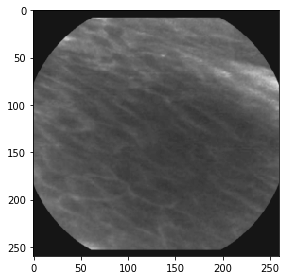

In [ ]:
#visualizar imagen
io.imshow(ejem) 
plt.show()

In [ ]:
%%time
img = datos['image_filename'][:].apply(lambda x: io.imread(x, as_gray=True))

CPU times: user 31.7 s, sys: 3.2 s, total: 34.9 s
Wall time: 29min 39s


## Paso 3. Visualizar ejemplos de imágenes de tejido cancerígeno y tejido sano


In [ ]:
def visualiza_porclase(lista_imagenes):
  #El método GroupBy de Pandas separa un data frame en varios data frames
  porClase=datos.groupby('class_number')

  #elije al azar n muestras de cada subconjunto y guarda la posición de las figuras elegidas en una lista
  n = 20
  c = random.sample(porClase.get_group(1).index.tolist(),n)
  s = random.sample(porClase.get_group(0).index.tolist(),n)

  # Grafica 20 imágenes aleatorias de tejido con cáncer y 20 de tejido sano

  fig = plt.figure(figsize=(16, 8))
  columns = 10
  rows = 4
  for i in range(0, columns*rows):
      fig.add_subplot( rows, columns, i+1)
      if i < 20:
          plt.imshow(lista_imagenes[c[i]], cmap='Greys_r')
          plt.title('cancer')
          plt.xticks([])
          plt.yticks([])
      else:
         plt.imshow(lista_imagenes[s[i-20]], cmap='Greys_r')
         plt.title('tejido sano')
         plt.xticks([])
         plt.yticks([])
  plt.show()

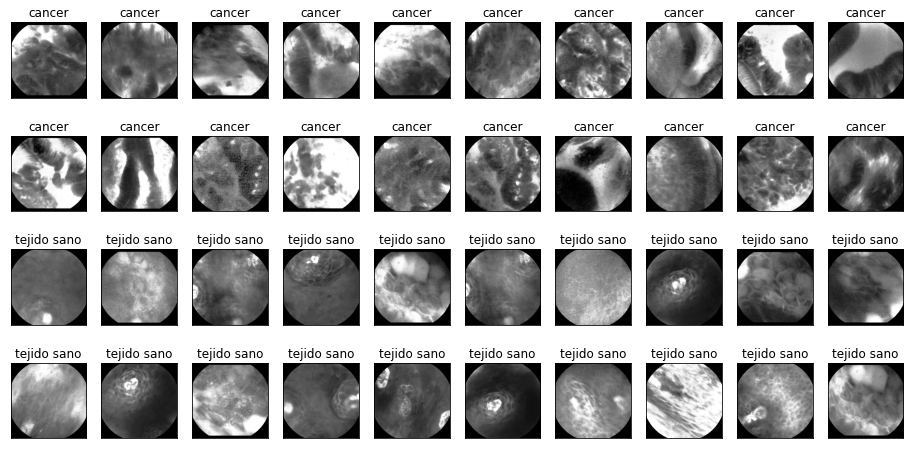

In [ ]:
visualiza_porclase(img)

# Paso 4. Reducción de imágenes

In [ ]:
%%time
img_scl = img.apply(lambda x:rescale(x , 1/10))

CPU times: user 35.2 s, sys: 28.2 s, total: 1min 3s
Wall time: 32.3 s


In [ ]:
img_scl[0].shape

(26, 26)

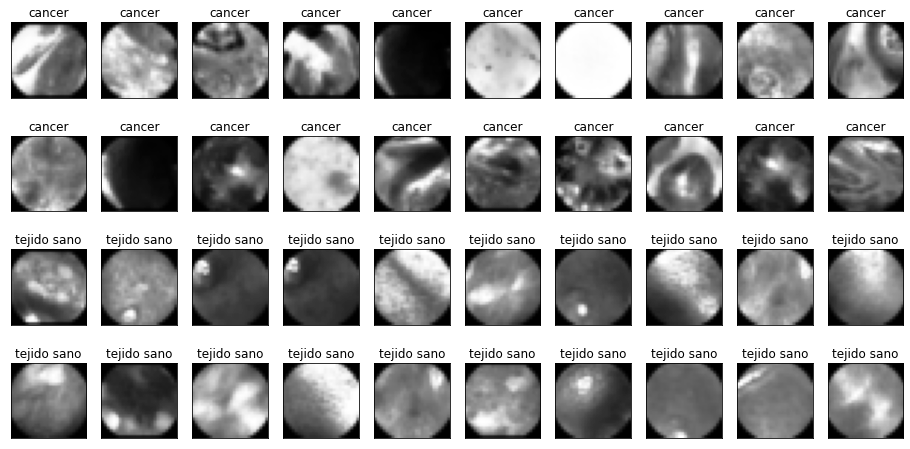

In [ ]:
visualiza_porclase(img_scl)

In [ ]:
IMG =np.stack(img_scl, axis=0)  # Toma una secuencia de matrices y las apila a lo largo 
                                 # de un tercer eje para hacer una sola matriz              
IMG.shape

(5063, 26, 26)

In [ ]:
X = IMG.reshape((IMG.shape[0], -1))
X.shape

(5063, 676)

In [ ]:
df = pd.DataFrame(data = X)
df['clase'] = datos['class_number']  #le pegamos al final la etiqueta
print(df.shape)
df

(5063, 677)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,clase
0,0.083223,0.083223,0.083223,0.083225,0.083405,0.086613,0.094121,0.095760,0.095939,0.095679,0.095800,0.096059,0.095816,0.097095,0.099579,0.104371,0.121509,0.151148,0.166485,0.142229,0.100965,0.084538,0.083237,0.083223,0.083223,0.083223,0.083223,0.083223,0.083240,0.084179,0.092702,0.113767,0.125615,0.128518,0.128971,0.129441,0.130263,0.130819,0.130473,0.130028,...,0.188656,0.188316,0.192373,0.195840,0.194437,0.196929,0.193218,0.175780,0.128152,0.089850,0.083352,0.083223,0.083223,0.083223,0.083223,0.083223,0.083259,0.085485,0.109178,0.145949,0.147400,0.147373,0.153215,0.136331,0.128650,0.127448,0.124526,0.123044,0.123262,0.126940,0.126231,0.126898,0.121795,0.099420,0.084719,0.083252,0.083223,0.083223,0.083223,0
1,0.083223,0.083223,0.083223,0.083241,0.084892,0.112470,0.192035,0.219843,0.187999,0.180500,0.186738,0.186549,0.189735,0.188186,0.190577,0.193022,0.192217,0.186904,0.186196,0.171629,0.112510,0.085044,0.083240,0.083223,0.083223,0.083223,0.083223,0.083223,0.083305,0.089308,0.159444,0.323082,0.435133,0.479868,0.425607,0.406373,0.416591,0.418254,0.416060,0.420284,...,0.350737,0.328330,0.313045,0.315160,0.312431,0.316695,0.318328,0.278893,0.166274,0.092502,0.083354,0.083223,0.083223,0.083223,0.083223,0.083223,0.083301,0.089128,0.159247,0.262119,0.234541,0.216824,0.201565,0.194039,0.190225,0.190590,0.191628,0.185784,0.175968,0.180713,0.180095,0.184120,0.171356,0.119763,0.086424,0.083276,0.083223,0.083223,0.083223,0
2,0.083223,0.083223,0.083223,0.083240,0.084891,0.108390,0.155804,0.162704,0.179060,0.174836,0.160696,0.163860,0.181359,0.174879,0.160358,0.162727,0.175161,0.189507,0.215191,0.226223,0.136367,0.086611,0.083256,0.083223,0.083223,0.083223,0.083223,0.083223,0.083272,0.087915,0.154537,0.309475,0.352005,0.328503,0.358213,0.373566,0.346785,0.339945,0.390837,0.392600,...,0.332288,0.331581,0.343050,0.345295,0.330323,0.323152,0.320105,0.279885,0.169279,0.092595,0.083367,0.083223,0.083223,0.083223,0.083223,0.083223,0.083344,0.091139,0.171438,0.296291,0.282717,0.251271,0.217253,0.197555,0.193422,0.184207,0.180436,0.170264,0.177799,0.194378,0.195019,0.178956,0.169096,0.118785,0.086534,0.083280,0.083223,0.083223,0.083223,0
3,0.083223,0.083223,0.083223,0.083241,0.084968,0.108683,0.163460,0.192673,0.178441,0.165327,0.172069,0.186495,0.178956,0.167983,0.162857,0.169700,0.184739,0.207286,0.224597,0.247589,0.140882,0.086850,0.083257,0.083223,0.083223,0.083223,0.083223,0.083223,0.083273,0.088753,0.156897,0.300279,0.347244,0.385530,0.391457,0.352362,0.352138,0.404086,0.410804,0.362560,...,0.364815,0.359175,0.341390,0.352469,0.337021,0.346255,0.342502,0.302029,0.177949,0.093565,0.083382,0.083223,0.083223,0.083223,0.083223,0.083223,0.083307,0.089709,0.165956,0.278964,0.248794,0.222636,0.206214,0.199162,0.194352,0.190506,0.195654,0.206230,0.195324,0.191298,0.182867,0.184448,0.180449,0.122997,0.086934,0.083285,0.083223,0.083223,0.083223,0
4,0.083223,0.083223,0.083223,0.083243,0.085150,0.125502,0.223968,0.188510,0.181894,0.181329,0.172335,0.169007,0.173832,0.184832,0.188771,0.204627,0.220360,0.238141,0.270100,0.229637,0.128614,0.086290,0.083253,0.083223,0.083223,0.083223,0.083223,0.083223,0.083290,0.089593,0.165005,0.366662,0.548632,0.433108,0.428869,0.439226,0.422466,0.382484,0.364961,0.389379,...,0.356768,0.350259,0.345512,0.349427,0.360185,0.365872,0.349878,0.325673,0.188289,0.094558,0.083407,0.083223,0.083223,0.083223,0.083223,0.083223,0.083289,0.087291,0.130107,0.201024,0.221397,0.227356,0.207675,0.190300,0.199108,0.204295,0.192606,0.190277,0.187772,0.186235,0.187462,0.198557,0.191787,0.125617,0.087338,0.083290,0.083223,0.083223,0.083223,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
df.to_csv('/content/drive/MyDrive/Datos/img_cancer_26x26pixeles_con_etiqueta.csv', index=False)